In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set_style('white')

In [3]:
df = pd.read_csv('Admission_Predict.csv')

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [6]:
print(df.UniversityRating.uniquie())

AttributeError: 'DataFrame' object has no attribute 'UniversityRating'

In [7]:
df.columns = ['Serial', 'GRE', 'TOEFL', 'Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit']

In [8]:
df

,Serial,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [9]:
print(df.Rating.unique())

[4 3 2 5 1]


In [17]:
df['GRE'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE, dtype: float64

In [18]:
#Feature # 1 with top GRE scores where GRE score is greater than 325 (the mean) 
features = pd.get_dummies(df['GRE'])
features['Top_GRE'] = np.where(df['GRE'] >=325, 1, 0)

In [19]:
print(df['GRE'].groupby(features['Top_GRE']).describe())

         count        mean       std    min    25%    50%    75%    max
Top_GRE                                                                
0        293.0  311.682594  8.557517  290.0  305.0  313.0  319.0  324.0
1        107.0  330.841121  4.732763  325.0  327.0  330.0  334.0  340.0


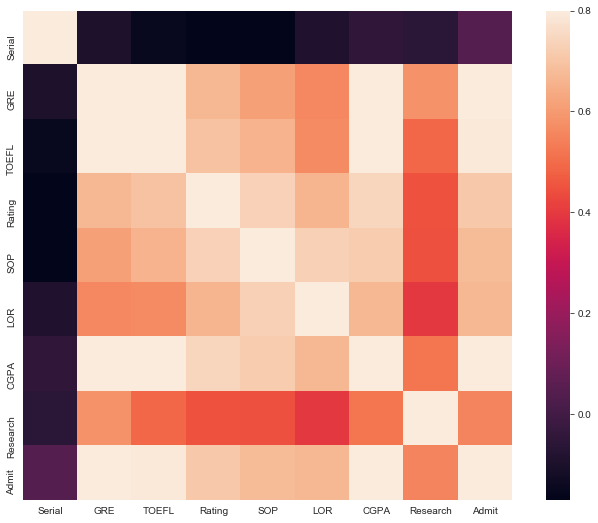

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [22]:
means = df[['Research','LOR','Rating']].mean(axis=0)
stds = df[['Research','LOR','Rating']].std(axis=0)
features['Research_LOR'] = ((df[['Research','LOR','Rating']] - means) / stds).mean(axis=1)


In [23]:
plotdf = df.loc[:, ['Research', 'LOR', 'Rating']]
plotdf['Research_LOR'] = features['Research_LOR'] 
corrmat2 = plotdf.corr()

print(corrmat2)

              Research       LOR    Rating  Research_LOR
Research      1.000000  0.396859  0.447783      0.752474
LOR           0.396859  1.000000  0.660123      0.839094
Rating        0.447783  0.660123  1.000000      0.859866
Research_LOR  0.752474  0.839094  0.859866      1.000000


In [24]:
corrmat2

,Research,LOR,Rating,Research_LOR
Research,1.000000,0.396859,0.447783,0.752474
LOR,0.396859,1.000000,0.660123,0.839094
Rating,0.447783,0.660123,1.000000,0.859866
Research_LOR,0.752474,0.839094,0.859866,1.000000


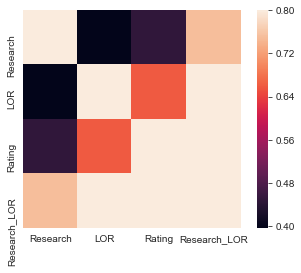

In [25]:
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

In [26]:
features['expensive'] = max(df['Rating'])

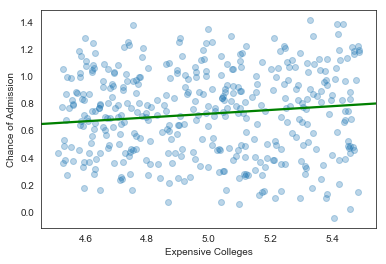

In [30]:
sns.regplot(features['expensive'],df['Admit'], x_jitter = .49, y_jitter = .49, 
           scatter_kws = {'alpha': 0.3}, line_kws = {'color': 'green'}, ci= None)
plt.xlabel('Expensive Colleges')
plt.ylabel('Chance of Admission')
plt.show()

In [31]:
df['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

In [32]:
features['Smart'] = np.where(df['CGPA'] >= 9, 1, 0)

In [34]:
features['Good_School'] = features['Smart'] * features['expensive']

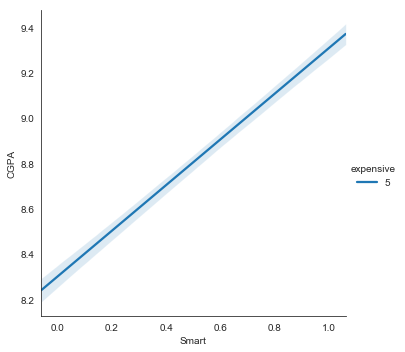

In [40]:
#Feature 2 - trying to see relationship between ppl w/ higher GPAs and their "smartness"
features['CGPA'] = df['CGPA']
sns.lmplot(
    x = 'Smart', 
    y = 'CGPA', 
    hue = 'expensive', 
    data = features,
    scatter =False)
plt.show()